<h1>Sign Traffic Detection

<h1> Import libraries

In [1]:
import tensorflow as tf     
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras import regularizers
import numpy as np         
import os    
import cv2 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


<h1>Read Data

In [97]:
#FUNCTION to Read  Data
def ReadData(path,nameofSet):
    
    Data=[]
    Path_image_folder=os.listdir(path)
    for folder in range(len(Path_image_folder)):
        images=os.listdir(os.path.join(path,Path_image_folder[folder]))

        for image in range(len(images)):

                imagePath=os.path.join(path,Path_image_folder[folder])
                Data.append( plt.imread(os.path.join(imagePath,images[image])) )
    print(f"the number of image in {nameofSet}Set",len(Data))     
    print("Shape of individual  image",Data[0].shape)
    print()
    return Data 





#Read Train Data
trainPath=r"D:\Work\AI work\BelgiumTSC_Training\Training"
TrainData=ReadData(trainPath,"Train")

#Read Validation Data
ValPath=r"D:\Work\AI work\BelgiumTSC_Validation\validation"
ValData=ReadData(ValPath,"Validation")

#Read test Data
testPath=r"D:\Work\AI work\BelgiumTSC_Testing\Testing"
TestData=ReadData(testPath,"Test")


the number of image in TrainSet 506
Shape of individual  image (141, 142, 3)

the number of image in ValidationSet 11
Shape of individual  image (107, 108, 3)

the number of image in TestSet 171
Shape of individual  image (107, 108, 3)



<h1> Visualize Data

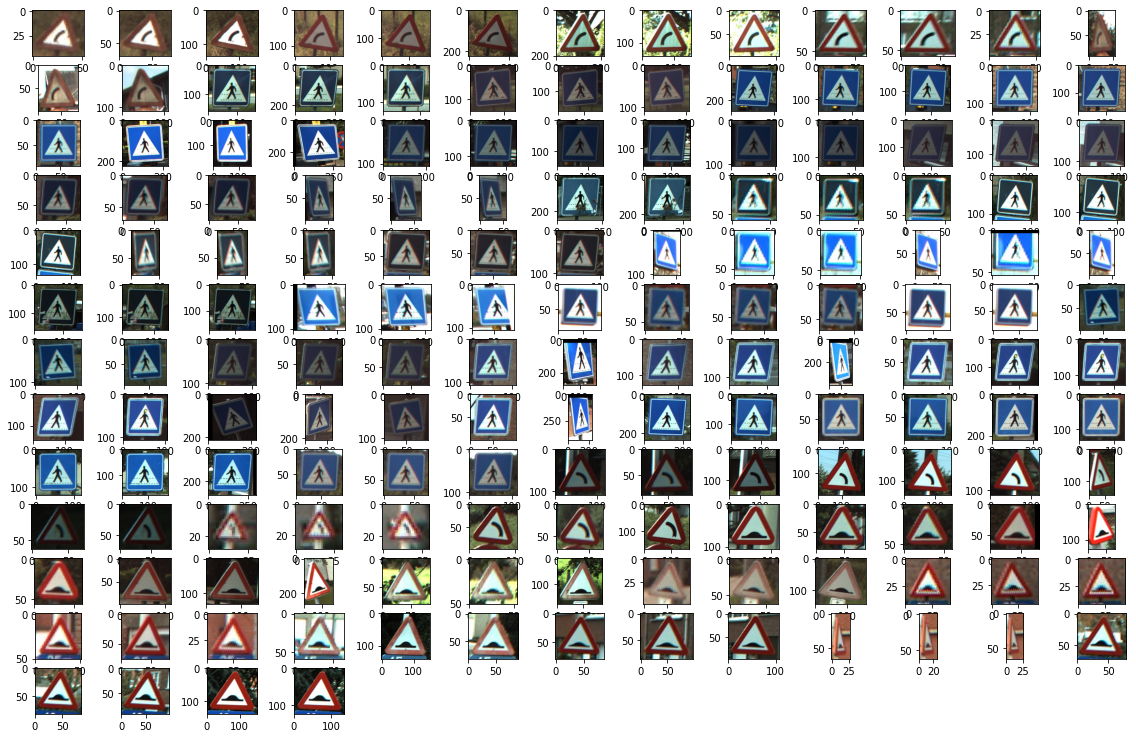

In [4]:
#read from DataSet Direct
plt.figure(figsize=(20,20))
for i in range(160): 
    plt.subplot(20,13,i+1)
    plt.imshow(TrainData[i])
plt.show()                 

<h1>Labels Data

In [275]:
Labels={0:"Uneven Road",
        1:"Hump",
        10:"Road Work",
        2:"Sippery road"
        ,3:"Bend to left",
        4:"Bend to right",
        5:"Left Reverse Bend",
        6:"Parking Lot Cars",
        7:"Ahead only",
        8:"Pedestrian crossing",
        9:"Cattle"}

Label : 0 - Uneven Road


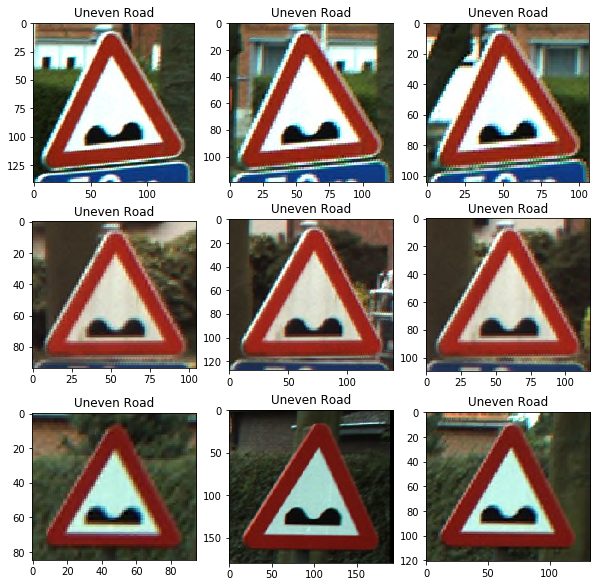


Label : 1 - Hump


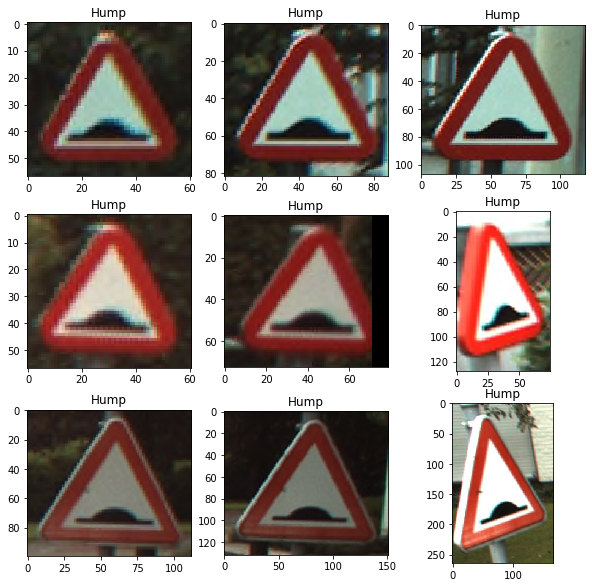


Label : 10 - Road Work


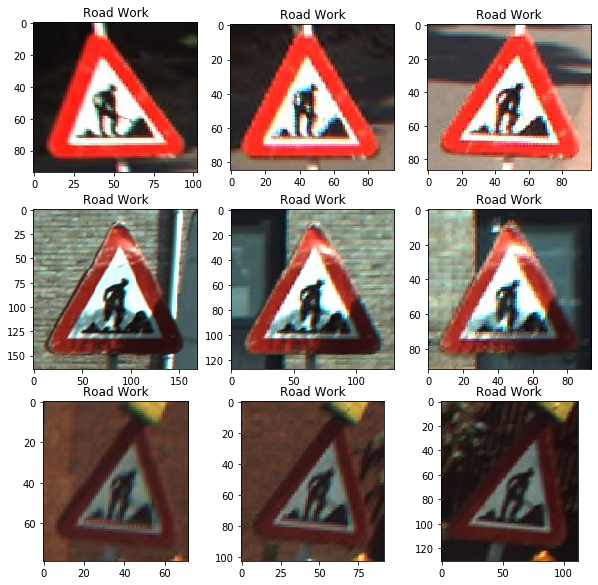


Label : 2 - Sippery road


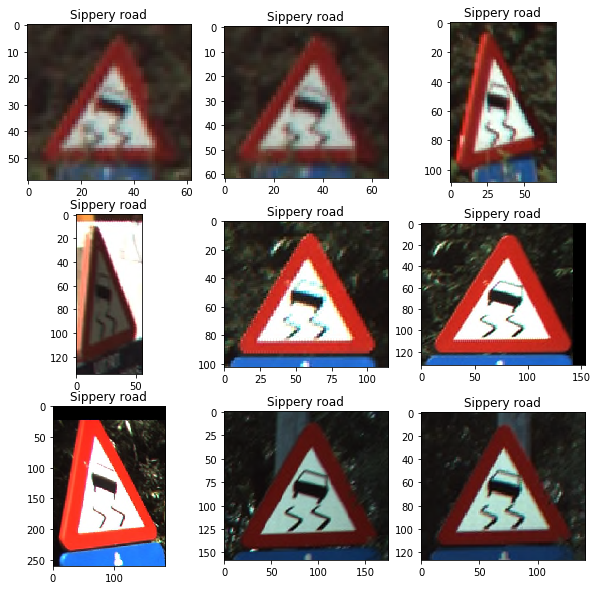


Label : 3 - Bend to left


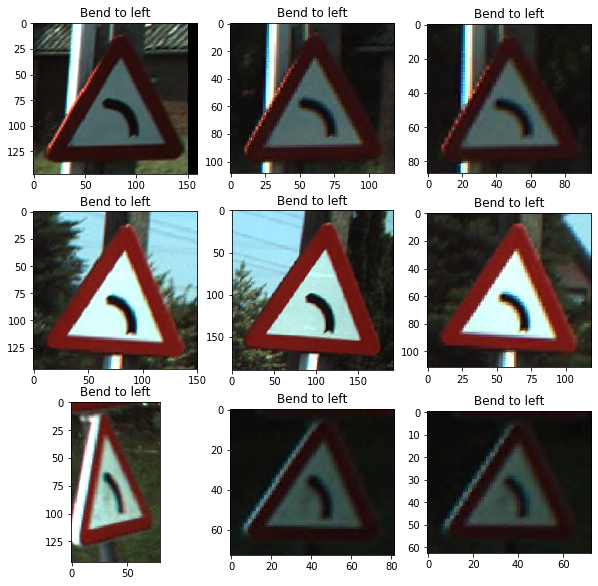


Label : 4 - Bend to right


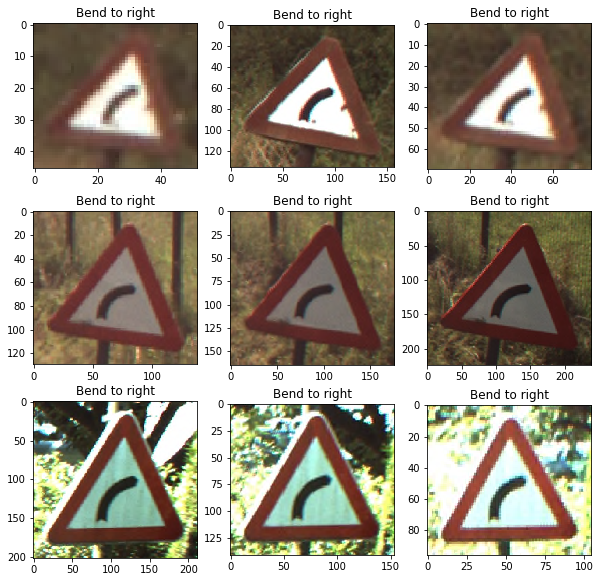


Label : 5 - Left Reverse Bend


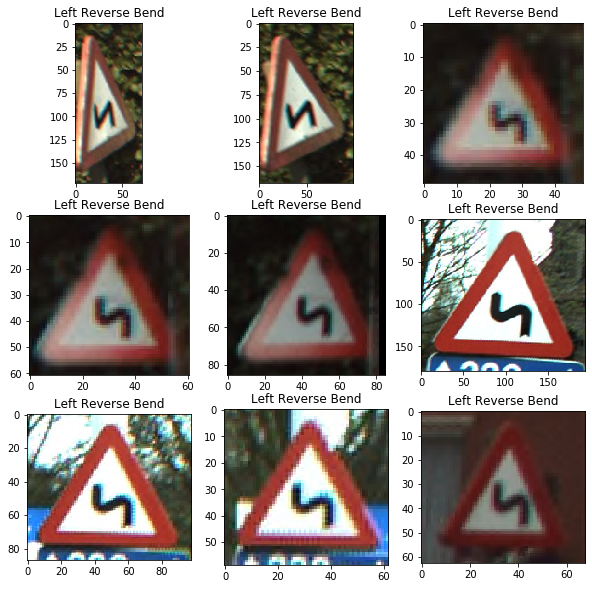


Label : 6 - Parking Lot Cars


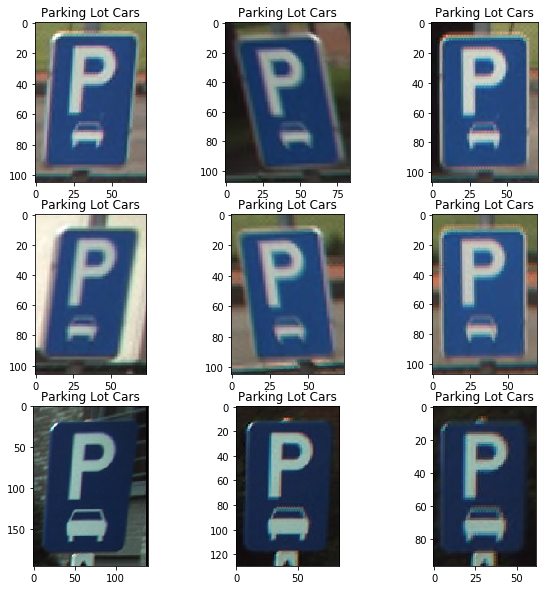


Label : 7 - Ahead only


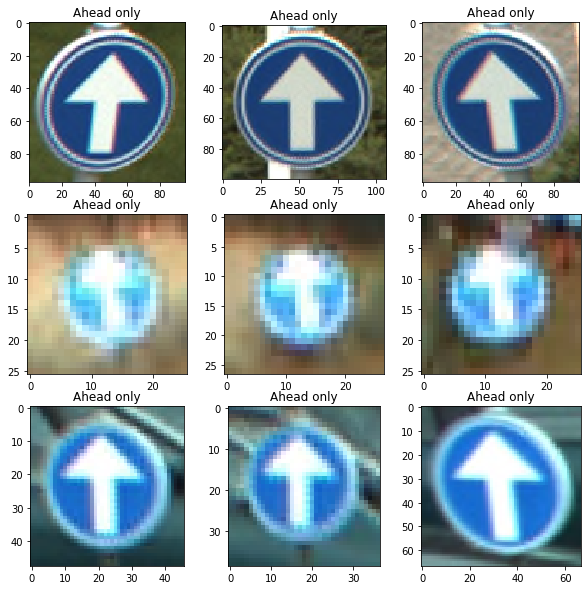


Label : 8 - Pedestrian crossing


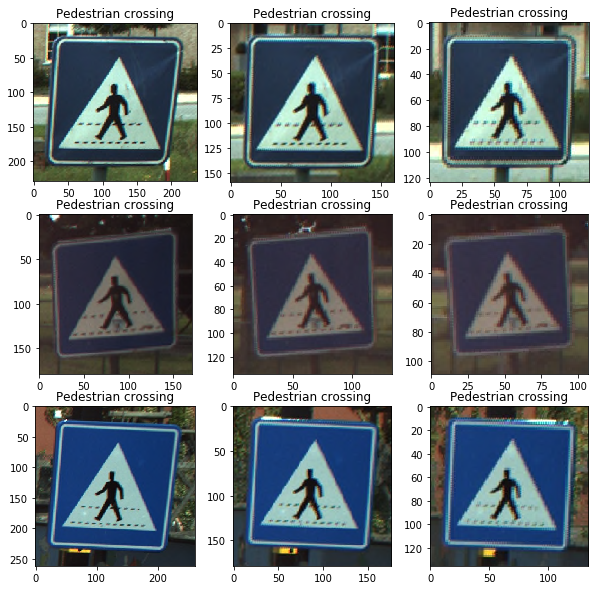


Label : 9 - Cattle


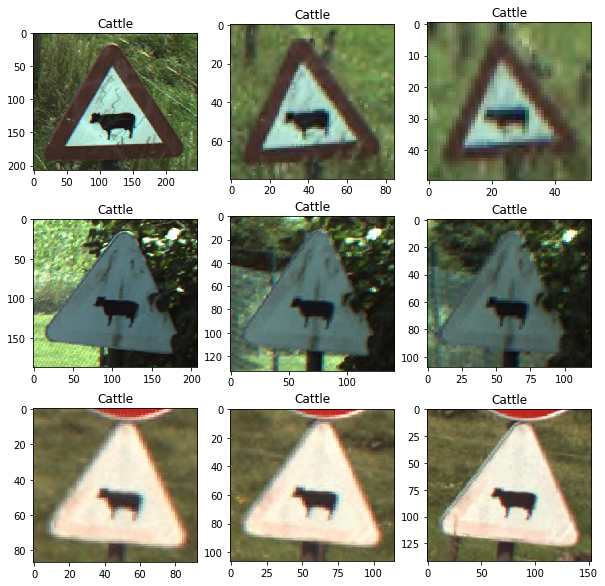

In [277]:
#read form train Path Of Files        
trainData_image_folder=os.listdir(trainPath)
for folder in trainData_image_folder:
    images=os.listdir(os.path.join(trainPath,folder))
    plt.figure(figsize=(10,10))
    NUMfolder=int(folder)
    print(f"Label : { folder} - {Labels[NUMfolder]}")
    for image in range(9):
            plt.subplot(3,3,image+1)
            imagePath=os.path.join(trainPath,folder)
            im = plt.imread(os.path.join(imagePath,images[image])) 
            plt.title(Labels[NUMfolder])
            plt.imshow(im)

    plt.show()
    print("==============================================================================================\n") 


    

Label : 0 - Uneven Road


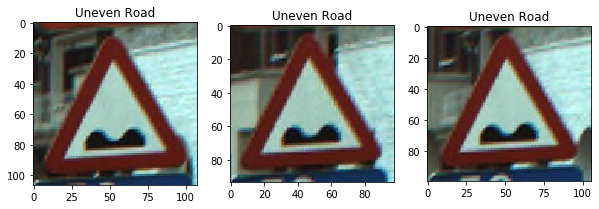


Label : 1 - Hump


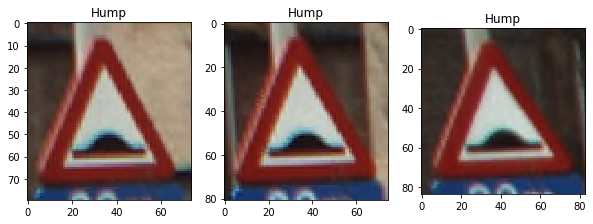


Label : 10 - Road Work


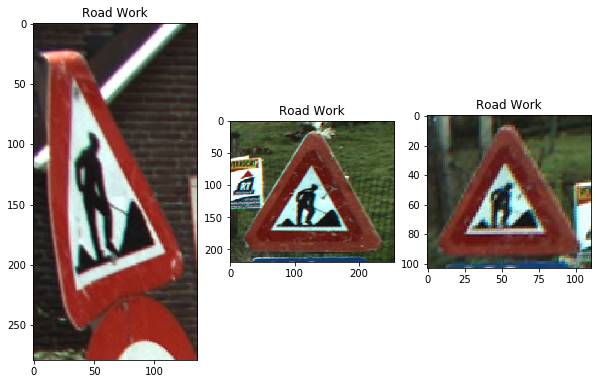


Label : 2 - Sippery road


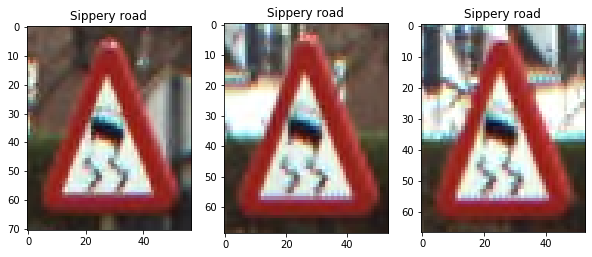


Label : 3 - Bend to left


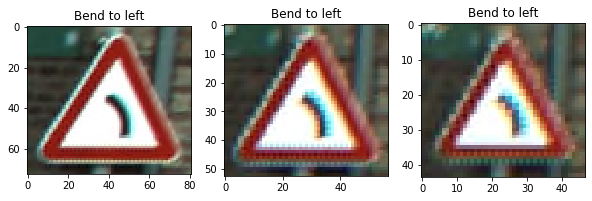


Label : 4 - Bend to right


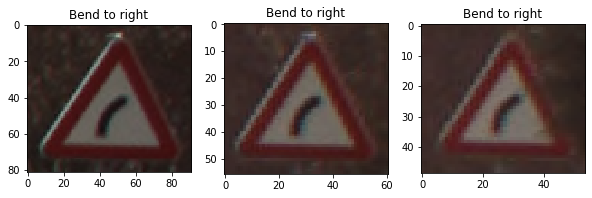


Label : 5 - Left Reverse Bend


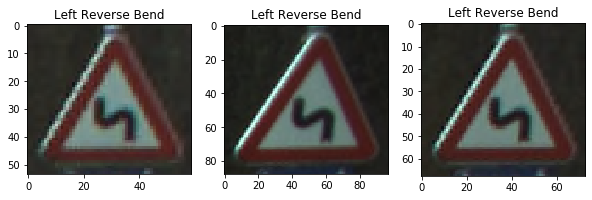


Label : 6 - Parking Lot Cars


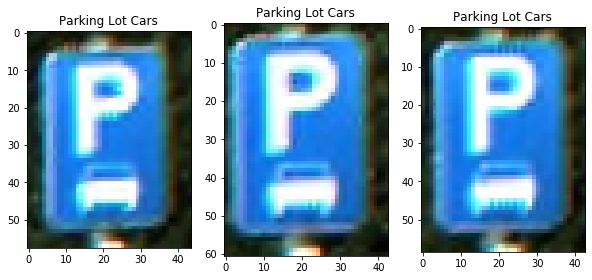


Label : 7 - Ahead only


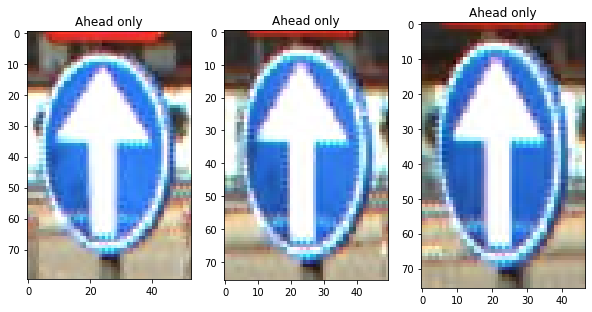


Label : 8 - Pedestrian crossing


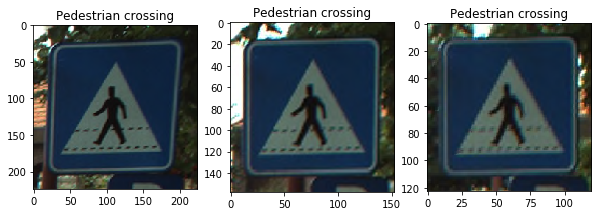


Label : 9 - Cattle


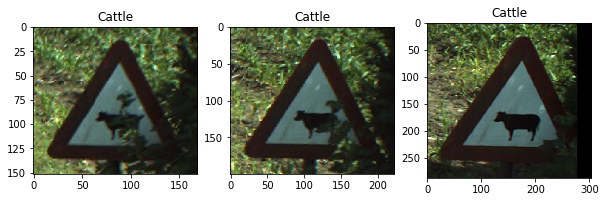

In [278]:
#read form test Path Of Files            
testData_image_folder=os.listdir(testPath)
for folder in testData_image_folder:
    images=os.listdir(os.path.join(testPath,folder))
    plt.figure(figsize=(10,10))
    NUMfolder=int(folder)
    print(f"Label : { folder} - {Labels[NUMfolder]}")
    for image in range(3):
            plt.subplot(1,3,image+1)
            imagePath=os.path.join(testPath,folder)
            im = plt.imread(os.path.join(imagePath,images[image])) 
            plt.title(Labels[NUMfolder])
            plt.imshow(im)

    plt.show()
    print("==============================================================================================\n") 


Label : 0 - Uneven Road


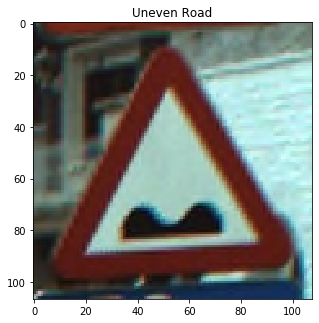


Label : 1 - Hump


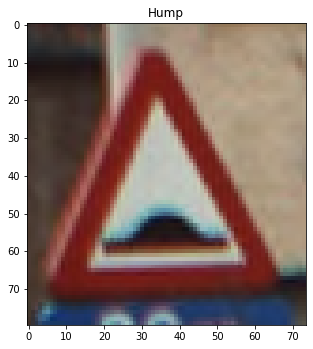


Label : 10 - Road Work


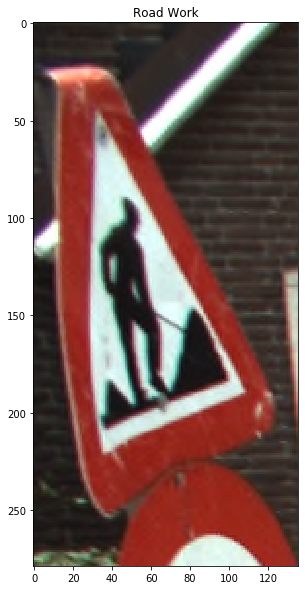


Label : 2 - Sippery road


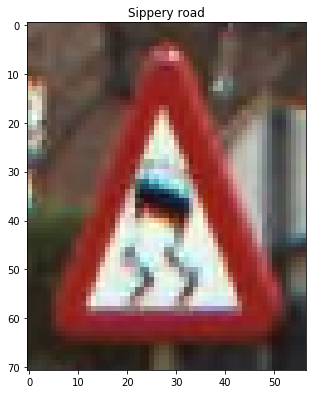


Label : 3 - Bend to left


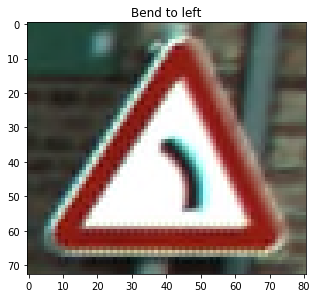


Label : 4 - Bend to right


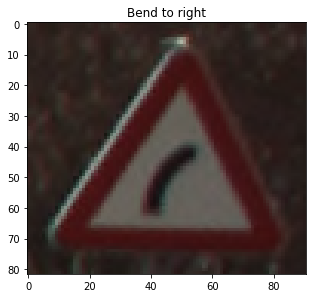


Label : 5 - Left Reverse Bend


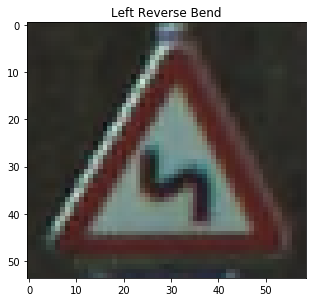


Label : 6 - Parking Lot Cars


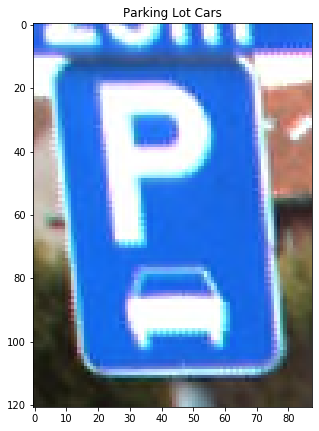


Label : 7 - Ahead only


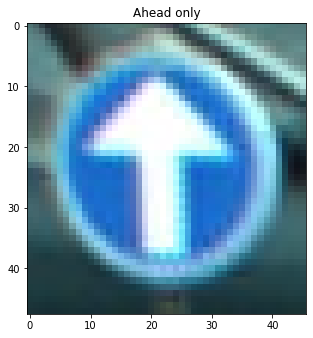


Label : 8 - Pedestrian crossing


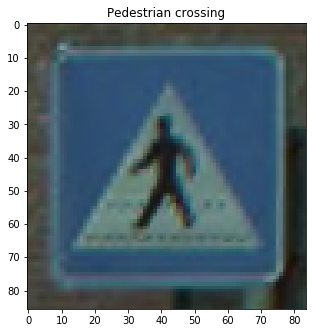


Label : 9 - Cattle


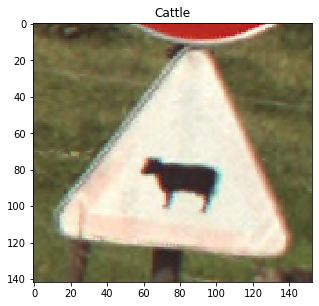

In [279]:
#read form Validation Path Of Files            
ValData_image_folder=os.listdir(ValPath)
for folder in ValData_image_folder:
    images=os.listdir(os.path.join(ValPath,folder))
    plt.figure(figsize=(5,10))
    NUMfolder=int(folder)
    print(f"Label : { folder} - {Labels[NUMfolder]}")
    for image in range(1):
            plt.subplot(1,1,image+1)
            imagePath=os.path.join(ValPath,folder)
            im = plt.imread(os.path.join(imagePath,images[image]))
            plt.title(Labels[NUMfolder])
            plt.imshow(im)

    plt.show()
    print("==============================================================================================\n") 


- After explored and Visualized My data , I saw these data have a different size  then , these  data must be resizing Before passing to model to make all image at the same size
<h1>I will Do this by DataAugmentation

In [7]:
#Effect DataAugmentation in individual Image
image_datagen = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization= True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
       horizontal_flip=True,
      rotation_range=45,
      fill_mode='nearest'      )
image=np.array(TrainData[1])
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
imageAfterAugmented=image_datagen.flow(image,batch_size=1)

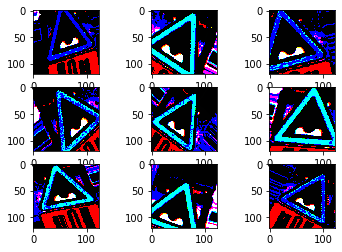

In [8]:
#Visualization Effect DataAugmentation in individual Image
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = imageAfterAugmented.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)


<h1> I will using flow from directory from (ImageDataGenerator) for many alots of thing , this allow me :-  </h1>
<ul> 
<li> - to read image from directory</li>
<li> - label these data by the name of subDirectory</li>
<li> - make the label as one hot encoder</li>
<li> - resize all image as the same size as (100,100,3)</li>
    <ul>

In [98]:
#Define image size
imageSize=100

Datagen = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization= True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
       horizontal_flip=True,
      rotation_range=45,
      fill_mode='nearest'
                                  )

trainGenerator =Datagen.flow_from_directory(
     trainPath,
     batch_size= 25,
     target_size=(imageSize, imageSize)

)

testGenerator =Datagen.flow_from_directory(
     testPath,
     batch_size= 10,
     target_size=(imageSize, imageSize)

)

ValidationGenerator =Datagen.flow_from_directory(
     ValPath,
     batch_size= 1,
     target_size=(imageSize, imageSize)

)

Found 506 images belonging to 11 classes.
Found 171 images belonging to 11 classes.
Found 11 images belonging to 11 classes.


In [10]:
#Show Labels for Image
trainLabel=trainGenerator.__getitem__(1)[1]
print("\n train Label Shape :",trainLabel.shape,"\n ")
print(trainLabel)

testLabel=testGenerator.__getitem__(1)[1]
print("\n train Label Shape :",testLabel.shape,"\n ")
print(testLabel)

validationLabel=ValidationGenerator.__getitem__(1)[1]
print("\n Validation Label Shape :",validationLabel.shape,"\n ")
print(validationLabel)


 train Label Shape : (25, 11) 
 
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 train Label Shape : (1, 11) 
 
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

<h1>Bulid Model As Transfer Learning Approach

In [11]:
#Load Weights for Inception
ModelWeightsInception=r"D:\Study\Courses\Machine learning and Deep learning\Transfer learning weights\inception_v3_weights_\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
print(ModelWeightsInception)

#Load Weights for Densenet

ModelWeightsDensenet=r"D:\Study\Courses\Machine learning and Deep learning\Transfer learning weights\Dense net weights\DenseNet-BC-169-32-no-top.h5"
print(ModelWeightsDensenet)

#Load Weights for Vgg-19

ModelWeightsVgg19=r"D:\Study\Courses\Machine learning and Deep learning\Transfer learning weights\vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5"
print(ModelWeightsVgg19)

D:\Study\Courses\Machine learning and Deep learning\Transfer learning weights\inception_v3_weights_\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
D:\Study\Courses\Machine learning and Deep learning\Transfer learning weights\Dense net weights\DenseNet-BC-169-32-no-top.h5
D:\Study\Courses\Machine learning and Deep learning\Transfer learning weights\vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5


<h1>import Models  InceptionV3 - DenseNet169 - ResNet152

In [12]:
# InceptionV3
from tensorflow.keras.applications.inception_v3  import InceptionV3
preTrainedModelInceptionV3 = InceptionV3(input_shape = (imageSize, imageSize, 3), 
                                include_top = False, 
                                weights = None)
preTrainedModelInceptionV3.load_weights(ModelWeightsInception)
for layer in preTrainedModelInceptionV3.layers:
    layer.trainable = False  
preTrainedModelInceptionV3.summary()

#==================================================================
# DenseNet169

from tensorflow.keras.applications.densenet  import DenseNet169
preTrainedModelDenseNet169 = DenseNet169(input_shape = (imageSize, imageSize, 3), 
                                include_top = False, 
                                weights = None)
preTrainedModelDenseNet169.load_weights(ModelWeightsDensenet)
for layer in preTrainedModelDenseNet169.layers:
    layer.trainable = False  
preTrainedModelDenseNet169.summary()

#==================================================================
# VGG-19

from tensorflow.keras.applications.vgg19  import VGG19
preTrainedModelVgg19 = VGG19(input_shape = (imageSize, imageSize, 3), 
                                include_top = False, 
                                weights = None)
preTrainedModelVgg19.load_weights(ModelWeightsVgg19)
for layer in preTrainedModelVgg19.layers:
    layer.trainable = False  
preTrainedModelVgg19.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

<h1>  Add trainable Layers (Owner Top)

In [13]:
#InceptionV3 Model
x=Flatten()(preTrainedModelInceptionV3.output)

#Fully Connection Layers
# FC1
x=Dense(1024, activation="relu")(x)
#Dropout to avoid overfitting effect
x=Dropout(0.4)(x)
# FC2
x=Dense(128, activation="relu")(x)
# FC3
x=Dense(64, activation="relu")(x)


#output layer
x=Dense(11,activation="softmax")(x)


modelInceptionV3=Model(preTrainedModelInceptionV3.input,x)
modelInceptionV3.summary()
#=======================================================
#DenseNet169 Model
x=Flatten()(preTrainedModelDenseNet169.output)

#Fully Connection Layers
# FC1
x=Dense(512, activation="relu")(x)
#Dropout to avoid overfitting effect
x=Dropout(0.4)(x)
# FC2
x=Dense(256, activation="relu")(x)


#output layer
x=Dense(11,activation="softmax")(x)


modelDenesNet=Model(preTrainedModelDenseNet169.input,x)
modelDenesNet.summary()
#=======================================================
#
x=Flatten()(preTrainedModelVgg19.output)

#Fully Connection Layer
# FC1
x=Dense(1024, activation="relu")(x)
#Dropout to avoid overfitting effect
x=Dropout(0.4)(x)
# FC2
x=Dense(512, activation="relu")(x)
#Dropout to avoid overfitting effect
x=Dropout(0.2)(x)
# FC3
x=Dense(256, activation="relu")(x)
# FC4
x=Dense(64, activation="relu")(x)

#output layer
x=Dense(11,activation="softmax")(x)


modelVgg19=Model(preTrainedModelVgg19.input,x)
modelVgg19.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

<h1>Compile Model

# HyperParameters



In [14]:

Epochs=100
StepsPerEpoch=20
LearningRate=0.0001
Momentum=0.001
Epsilon=1e-07


In [16]:
#Optimization
opt=tf.keras.optimizers.RMSprop(
    learning_rate=LearningRate,
    momentum=Momentum,
    epsilon=Epsilon,
    name="RMSprop",
)


#compile InceptionV3 Model
modelInceptionV3.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])
#compile DenseNet Model
modelDenesNet.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])
#compile Vgg19 Model
modelVgg19.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])

<h1>Fit Models With 100 Epochs

In [17]:
#fit InceptionV3 Model
historyInceptionV3Model=modelInceptionV3.fit_generator(trainGenerator,validation_data=ValidationGenerator ,epochs=Epochs 
                                                       ,steps_per_epoch=StepsPerEpoch,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 6s 315ms/step - loss: 1.8454 - accuracy: 0.4220 - val_loss: 1.8220 - val_accuracy: 0.4152
Epoch 2/100
20/20 [==============================] - 5s 258ms/step - loss: 1.4843 - accuracy: 0.5842 - val_loss: 1.7193 - val_accuracy: 0.4327
Epoch 3/100
20/20 [==============================] - 5s 268ms/step - loss: 1.3002 - accuracy: 0.6279 - val_loss: 1.6983 - val_accuracy: 0.4620
Epoch 4/100
20/20 [==============================] - 5s 266ms/step - loss: 1.2591 - accuracy: 0.6424 - val_loss: 1.5705 - val_accuracy: 0.4971
Epoch 5/100
20/20 [==============================] - 5s 273ms/step - loss: 1.1874 - accuracy: 0.6528 - val_loss: 1.5821 - val_accuracy: 0.5205
Epoch 6/100
20/20 [==============================] - 6s 286ms/step - loss: 1.0937 - accuracy: 0.6840 - val_loss: 1.4630 - val_accuracy: 0.5263
Epoch 7/100
20/20 [==============================] - 5s 271ms/step

In [18]:
#fit DenseNet Model
historyDenseNetModel=modelDenesNet.fit_generator(trainGenerator,validation_data=ValidationGenerator ,
                                                 epochs=Epochs ,steps_per_epoch=StepsPerEpoch,verbose=1)

Epoch 1/100
20/20 [==============================] - 15s 747ms/step - loss: 1.7970 - accuracy: 0.5904 - val_loss: 1.6726 - val_accuracy: 0.5965
Epoch 2/100
20/20 [==============================] - 13s 658ms/step - loss: 0.7991 - accuracy: 0.7734 - val_loss: 1.2452 - val_accuracy: 0.6433
Epoch 3/100
20/20 [==============================] - 13s 633ms/step - loss: 0.7367 - accuracy: 0.7963 - val_loss: 1.1008 - val_accuracy: 0.7193
Epoch 4/100
20/20 [==============================] - 13s 664ms/step - loss: 0.5577 - accuracy: 0.8316 - val_loss: 0.9979 - val_accuracy: 0.7076
Epoch 5/100
20/20 [==============================] - 12s 624ms/step - loss: 0.5185 - accuracy: 0.8337 - val_loss: 1.0263 - val_accuracy: 0.6784
Epoch 6/100
20/20 [==============================] - 13s 633ms/step - loss: 0.4785 - accuracy: 0.8524 - val_loss: 0.7797 - val_accuracy: 0.7193
Epoch 7/100
20/20 [==============================] - 13s 633ms/step - loss: 0.4206 - accuracy: 0.8690 - val_loss: 0.8625 - val_accuracy:

In [19]:
#fit Vgg19 Model
historyVgg19Model=modelVgg19.fit_generator(trainGenerator,validation_data=ValidationGenerator ,epochs=Epochs 
                                           ,steps_per_epoch=StepsPerEpoch,verbose=1)

Epoch 1/100
20/20 [==============================] - 18s 883ms/step - loss: 1.7914 - accuracy: 0.4532 - val_loss: 1.8730 - val_accuracy: 0.5205
Epoch 2/100
20/20 [==============================] - 17s 859ms/step - loss: 1.2281 - accuracy: 0.6861 - val_loss: 1.6388 - val_accuracy: 0.5731
Epoch 3/100
20/20 [==============================] - 17s 858ms/step - loss: 0.9613 - accuracy: 0.7568 - val_loss: 1.3430 - val_accuracy: 0.5789
Epoch 4/100
20/20 [==============================] - 18s 880ms/step - loss: 0.8000 - accuracy: 0.7660 - val_loss: 1.4293 - val_accuracy: 0.5965
Epoch 5/100
20/20 [==============================] - 17s 854ms/step - loss: 0.7196 - accuracy: 0.7963 - val_loss: 1.1561 - val_accuracy: 0.6140
Epoch 6/100
20/20 [==============================] - 18s 880ms/step - loss: 0.6812 - accuracy: 0.7921 - val_loss: 1.1313 - val_accuracy: 0.5965
Epoch 7/100
20/20 [==============================] - 17s 860ms/step - loss: 0.5790 - accuracy: 0.8129 - val_loss: 1.1957 - val_accuracy:

<h1> Visualizing Accuracy and loss 

- the Accuracy and Loss for InceptionV3 Model With 100 Epochs


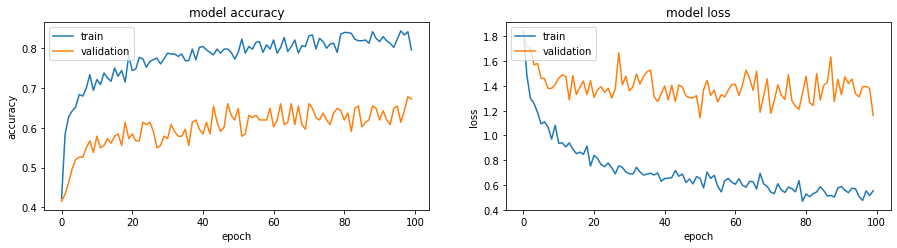

- the Accuracy and Loss for DenseNet Model With 100 Epochs


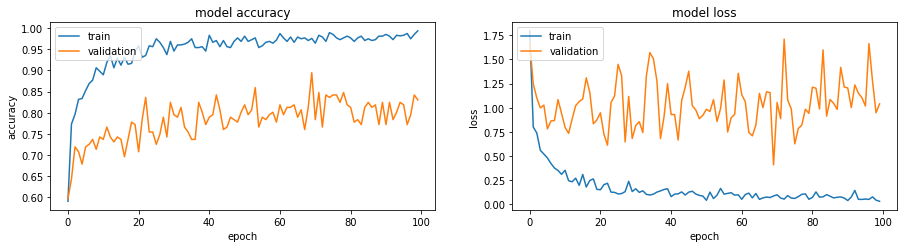

- the Accuracy and Loss for Vgg19 Model With 100 Epochs


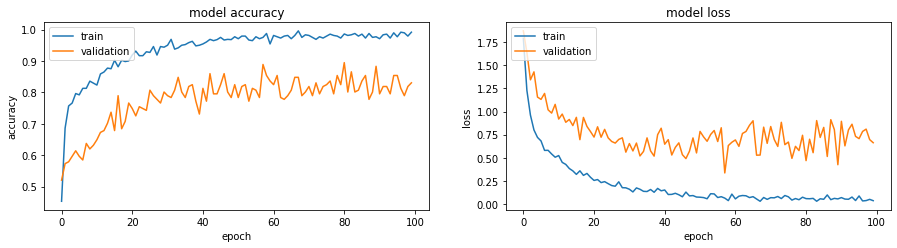

In [21]:
#InceptionV3 Model

print("- the Accuracy and Loss for InceptionV3 Model With 100 Epochs")
plt.figure(figsize=(40,20))
# summarize history for accuracy
plt.subplot(5,5,1)
plt.plot(historyInceptionV3Model.history['accuracy'])
plt.plot(historyInceptionV3Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')


# summarize history for loss
plt.subplot(5,5,2)
plt.plot(historyInceptionV3Model.history['loss'])
plt.plot(historyInceptionV3Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#==============================================================================================================
#DenseNet Model

print("- the Accuracy and Loss for DenseNet Model With 100 Epochs")

plt.figure(figsize=(40,20))
# summarize history for accuracy
plt.subplot(5,5,1)
plt.plot(historyDenseNetModel.history['accuracy'])
plt.plot(historyDenseNetModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')


# summarize history for loss
plt.subplot(5,5,2)
plt.plot(historyDenseNetModel.history['loss'])
plt.plot(historyDenseNetModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#==============================================================================================================
#Vgg19 Model

print("- the Accuracy and Loss for Vgg19 Model With 100 Epochs")

plt.figure(figsize=(40,20))
# summarize history for accuracy
plt.subplot(5,5,1)
plt.plot(historyVgg19Model.history['accuracy'])
plt.plot(historyVgg19Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')


# summarize history for loss
plt.subplot(5,5,2)
plt.plot(historyVgg19Model.history['loss'])
plt.plot(historyVgg19Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

<h1> Evaluate Models With Test Dataset to get Accuracy for Each Model

In [196]:
#Evaluate InceptionV3 Model
print("Evaluate InceptionV3 Model")
modelInceptionV3.evaluate(testGenerator)

Evaluate InceptionV3 Model
18/18 [==============================] - 1s 51ms/step - loss: 1.4943 - accuracy: 0.6725


[1.4943480491638184, 0.6725146174430847]

In [202]:
#Evaluate DenesNet Model
print("\nEvaluate DenesNet Model")
modelDenesNet.evaluate(testGenerator)


Evaluate DenesNet Model
18/18 [==============================] - 3s 147ms/step - loss: 0.8909 - accuracy: 0.8304


[0.8908941149711609, 0.8304093480110168]

In [213]:
#Evaluate Vgg19 Model
print("\nEvaluate Vgg19 Model")
modelVgg19.evaluate(testGenerator)


Evaluate Vgg19 Model
18/18 [==============================] - 4s 222ms/step - loss: 0.6212 - accuracy: 0.8421


[0.6211857199668884, 0.8421052694320679]

<h1> Save Weights For All Models to use For Prediction Later

In [260]:
#Save InceptionV3 Model
modelInceptionV3.save("WeightsForModelInceptionV3.h5")

#Save DenesNet Model
modelDenesNet.save("WeightsForModelDenesNet.h5")

#Save Vgg19 Model
modelVgg19.save("WeightsForModelVgg19.h5")

<h1> Load All Model Again

In [261]:
from tensorflow.keras.models import load_model
#Load InceptionV3 model
LoadInceptionV3Model=load_model("WeightsForModelInceptionV3.h5")
LoadInceptionV3Model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])

#Load DenesNet model
LoadDenesNetModel=load_model("WeightsForModelDenesNet.h5")
LoadDenesNetModel.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])

#Load Vgg19 model
LoadVgg19Model=load_model("WeightsForModelVgg19.h5")
LoadVgg19Model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])


<h1>  Predict Models

In [262]:

#Get test data to use for prediction
testData=testGenerator

In [263]:
#Get X_test data to use for prediction
Xtest=[]
for i in range(18):
    Xtest.extend(testData.__getitem__(i)[0])
print("number of images in testset ",len(Xtest))
Xtest=np.array(Xtest)
print("the Shape Of testset",Xtest.shape)

number of images in testset  171
the Shape Of testset (171, 100, 100, 3)


In [264]:
#predict InceptionV3 Model
PredInceptionV3Model=LoadInceptionV3Model.predict(Xtest)

#predict DenesNet Model
PredDenesNetModel=LoadDenesNetModel.predict(Xtest)

#predict Vgg19 Model
PredVgg19Model= LoadVgg19Model.predict(Xtest)

In [265]:
#Get Y_test data to use for Compare with the predicted value
y_test=[]
for i in range(18):
    y_test.extend(testData.__getitem__(i)[1])

In [266]:
#Visualize y_test and Get the index for prediction
print("number of image in labels testset ",len(y_test))
y_test2=np.array(y_test)
y_test=np.argmax(y_test,axis=1)
print("y test : \n",y_test)

number of image in labels testset  171
y test : 
 [ 7  9  1  7  7  3  7  4  3  1  7  9  9  1  9  0  2  8  7  2  0 10  4  2
 10  9  1  1  7  5  0  6 10  9  8  9  7  8  5  2  2 10  9  1  9  8  9  7
  2  7  2  8  7  7  9  9 10  9  3  7 10  2  5  1  9  2  9  1  9  6  8  0
  7 10  7  0  1  7  2  1  9  1  1  5  7  3  7  9  4  9  5  9  9  5  7  9
  9  7  9 10  9  0  9  1 10  2  8  9  8  1  2  8  2  7  1  1  7  2  2  7
  7  3  5  5  2  1  2  6  7  9  1  2  1  2  2  1  9  2  2  1  4  7  5  9
  5  1  3  1  4  5  7  3  1  7  9  1  5  7  7  2  2  2  2  1  9  4  2  9
  1  2  7]


In [267]:
#Process on Prediction values for InceptionV3 Model
PredInceptionV3Model= np.argmax(PredInceptionV3Model,axis=1)
print("Prediction values for InceptionV3 Model :\n",PredInceptionV3Model)

#Process on Prediction values for DenesNet Model
PredDenesNetModel= np.argmax(PredDenesNetModel,axis=1)
print("\nPrediction values for DenesNet Model :\n",PredDenesNetModel)

#Process on Prediction values for Vgg19 Model
PredVgg19Model= np.argmax(PredVgg19Model,axis=1)
print("\nPrediction values for Vgg19 Model :\n",PredVgg19Model)


Prediction values for InceptionV3 Model :
 [ 7  9  1  7  7  1  1  1  1  1  7  9  9  1  9  9  1  8  7  1  1 10  1  2
  1  9  1  1  7  1  1  9 10  1  8  9  7  8  1  2  2  1  4  1  1  8  9  7
  9  7  2  8  7  7  9  9 10  9  1  7 10  3  1  4  9  1  9  1  9  1  8  1
  7  1  7  1  1  7  1  9  9  1  1  2  7  0  2  9  1  9  1  9  9  0  7  9
  9  7  9  1  9  1  9  1  1  1  8  9  2  1  9  8 10  7  1  1  7 10  1  7
  1  6  1  1  3  1  2  1  7  9  1  5  1  1  1  1  9  4  1  1  0  7  1  9
  1  1  1  1  1  1  7  1  1  7  9  1  1  7  7  2  2  1  2  1  9  1  1  9
  1  1  7]

Prediction values for DenesNet Model :
 [ 7  9  1  7  7  6  7  1  5  1  7  9  9  1  9  1  1  8  7  2  1 10 10  2
 10  9  1  1  7  4  0  1 10  9  8  9  7  8  1  2  2 10  9  1  9  8  9  7
  2  7  2  8  7  7  9  9 10  9  3  7 10  2  1  1  9  2  9  1  9  4  8  0
  7 10  7  1  1  7  2  1  9  1  1  1  7  3  7  9  0  9  5  9  9  6  7  9
  9  7  9 10  9  1  9  1 10  2  8  9  8  1  2  8  2  7  1  1  7 10  6  7
  7  2  4  5  2  1  2  4  7  

<h1>confusion matrix to check on accuracy 

[[ 0  5  0  0  0  0  0  0  0  1  0]
 [ 0 25  0  0  1  0  0  0  0  1  0]
 [ 0 12  8  2  1  1  0  0  0  2  2]
 [ 1  5  0  0  0  0  1  0  0  0  0]
 [ 1  5  0  0  0  0  0  0  0  0  0]
 [ 1 10  1  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  1  0]
 [ 0  2  1  0  0  0  0 28  0  0  0]
 [ 0  0  1  0  0  0  0  0  8  0  0]
 [ 0  2  0  0  1  0  0  0  0 30  0]
 [ 0  5  0  0  0  0  0  0  0  0  4]]


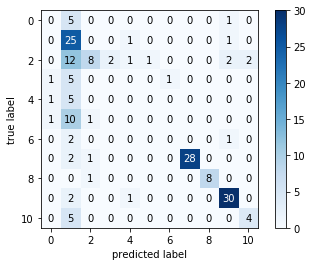

In [268]:
#confusion matrix  for InceptionV3 Model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,PredInceptionV3Model)
print(cm)
#Visualizing confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True)
plt.show()

[[ 2  4  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0  0]
 [ 0  4 20  1  0  1  1  0  0  0  1]
 [ 0  0  1  4  0  1  1  0  0  0  0]
 [ 1  2  0  0  0  2  0  0  0  0  1]
 [ 0  4  0  0  4  3  1  0  0  0  0]
 [ 0  1  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0  0  9]]


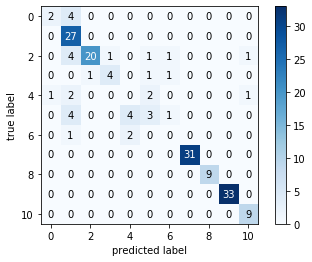

In [269]:
#confusion matrix  for DenesNet Model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,PredDenesNetModel)
print(cm)
#Visualizing confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True)
plt.show()

[[ 3  3  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0  0]
 [ 0  2 22  0  0  1  2  0  0  0  1]
 [ 0  1  2  3  0  1  0  0  0  0  0]
 [ 1  1  0  0  3  0  0  0  0  0  1]
 [ 0  2  0  1  6  3  0  0  0  0  0]
 [ 0  0  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0  0  9]]


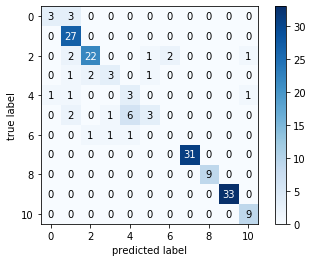

In [270]:
#confusion matrix  for Vgg19 Model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,PredVgg19Model)
print(cm)
#Visualizing confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True)
plt.show()

<h1>Classification Report

In [271]:
#Classification Report for InceptionV3 Model
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,PredInceptionV3Model)
print('Classification Report for InceptionV3 Model is : \n ', ClassificationReport )

Classification Report for InceptionV3 Model is : 
                precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.34      0.93      0.50        27
           2       0.73      0.29      0.41        28
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         3
           7       1.00      0.90      0.95        31
           8       1.00      0.89      0.94         9
           9       0.86      0.91      0.88        33
          10       0.67      0.44      0.53         9

    accuracy                           0.60       171
   macro avg       0.42      0.40      0.38       171
weighted avg       0.61      0.60      0.57       171



In [272]:
#Classification Report  for DenesNet Model
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,PredDenesNetModel)
print('Classification Report for DenesNet Model is : \n', ClassificationReport )

Classification Report for DenesNet Model is : 
               precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.64      1.00      0.78        27
           2       0.95      0.71      0.82        28
           3       0.80      0.57      0.67         7
           4       0.00      0.00      0.00         6
           5       0.43      0.25      0.32        12
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        33
          10       0.82      1.00      0.90         9

    accuracy                           0.81       171
   macro avg       0.66      0.62      0.63       171
weighted avg       0.81      0.81      0.80       171



In [273]:
#Classification Report for Vgg19 Model
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,PredVgg19Model)
print('Classification Report for Vgg19 Model is : \n', ClassificationReport )

Classification Report for Vgg19 Model is : 
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.75      1.00      0.86        27
           2       0.88      0.79      0.83        28
           3       0.60      0.43      0.50         7
           4       0.30      0.50      0.37         6
           5       0.60      0.25      0.35        12
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        33
          10       0.82      1.00      0.90         9

    accuracy                           0.84       171
   macro avg       0.70      0.68      0.67       171
weighted avg       0.84      0.84      0.82       171

